In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import ccxt
import requests
import json

In [83]:
print(ccxt.exchanges)
exchanges = ccxt.exchanges

['_1broker', '_1btcxe', 'acx', 'allcoin', 'anxpro', 'bibox', 'binance', 'bit2c', 'bitbank', 'bitbay', 'bitfinex', 'bitfinex2', 'bitflyer', 'bithumb', 'bitkk', 'bitlish', 'bitmarket', 'bitmex', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitz', 'bl3p', 'bleutrade', 'braziliex', 'btcbox', 'btcchina', 'btcexchange', 'btcmarkets', 'btctradeim', 'btctradeua', 'btcturk', 'btcx', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'cobinhood', 'coincheck', 'coinegg', 'coinex', 'coinexchange', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinnest', 'coinone', 'coinsecure', 'coinspot', 'coolcoin', 'cryptopia', 'dsx', 'ethfinex', 'exmo', 'exx', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gateio', 'gdax', 'gemini', 'getbtc', 'hadax', 'hitbtc', 'hitbtc2', 'huobi', 'huobicny', 'huobipro', 'ice3x', 'independentreserve', 'indodax', 'itbit', 'jubi', 'kraken', 'kucoin', 'kuna', 'lakebtc', 'lbank', 'liqui', 'livecoin', 'luno', 'lykke', 'mercado', 'mixcoins', 'negociecoins', 'nova', 'okcoincn

In [2]:
?ccxt

Type:        module
String form: <module 'ccxt' from 'c:\\users\\garrick\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\ccxt\\__init__.py'>
File:        c:\users\garrick\anaconda3\envs\tensorflow\lib\site-packages\ccxt\__init__.py
Docstring:   CCXT: CryptoCurrency eXchange Trading Library


In [3]:
req = requests.get('http://coincap.io/front')

In [5]:
coin_json = req.json()

In [89]:
coin_df = pd.DataFrame(coin_json)

In [90]:
coin_df.head()

,cap24hrChange,long,mktcap,perc,price,shapeshift,short,supply,usdVolume,volume,vwapData,vwapDataBTC
0,4.92,Bitcoin,1.581154e+11,4.92,9299.830000,True,BTC,17001962,8.055870e+09,8.055870e+09,9169.630907,9169.630907
1,7.43,Ethereum,6.731686e+10,7.43,679.400000,True,ETH,99082812,2.723230e+09,2.723230e+09,654.428994,654.428994
2,3.93,Ripple,3.323932e+10,3.93,0.849107,True,XRP,39146203398,7.682390e+08,7.682390e+08,0.833963,0.833963
3,5.47,Bitcoin Cash,2.408278e+10,5.47,1408.600000,True,BCH,17096963,1.033880e+09,1.033880e+09,1384.530627,1384.530627
4,17.60,EOS,1.415679e+10,17.60,17.256300,True,EOS,820384003,2.194510e+09,2.194510e+09,15.370812,15.370812


In [91]:
coin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 12 columns):
cap24hrChange    1281 non-null float64
long             1281 non-null object
mktcap           1281 non-null float64
perc             1281 non-null float64
price            1281 non-null float64
shapeshift       1281 non-null bool
short            1281 non-null object
supply           1281 non-null int64
usdVolume        1281 non-null float64
volume           1281 non-null float64
vwapData         1281 non-null float64
vwapDataBTC      1281 non-null float64
dtypes: bool(1), float64(8), int64(1), object(2)
memory usage: 111.4+ KB


In [92]:
set(coin_df.isnull().sum())

{0}

Data looks good, no nulls.  OK to begin sort by market cap (need top 500 coins).  Export this out as master coin JSON, later need script to add if new coin etners top 500. 

In [93]:
coin_df.sort_values('mktcap', ascending=False)
coin_df.head(10)

,cap24hrChange,long,mktcap,perc,price,shapeshift,short,supply,usdVolume,volume,vwapData,vwapDataBTC
0,4.92,Bitcoin,1.581154e+11,4.92,9299.830000,True,BTC,17001962,8.055870e+09,8.055870e+09,9169.630907,9169.630907
1,7.43,Ethereum,6.731686e+10,7.43,679.400000,True,ETH,99082812,2.723230e+09,2.723230e+09,654.428994,654.428994
2,3.93,Ripple,3.323932e+10,3.93,0.849107,True,XRP,39146203398,7.682390e+08,7.682390e+08,0.833963,0.833963
3,5.47,Bitcoin Cash,2.408278e+10,5.47,1408.600000,True,BCH,17096963,1.033880e+09,1.033880e+09,1384.530627,1384.530627
4,17.60,EOS,1.415679e+10,17.60,17.256300,True,EOS,820384003,2.194510e+09,2.194510e+09,15.370812,15.370812
5,3.47,Litecoin,8.546774e+09,3.47,151.877000,True,LTC,56274313,4.164800e+08,4.164800e+08,145.925441,145.925441
6,7.96,Cardano,7.869981e+09,7.96,0.303543,False,ADA,25927070538,2.010820e+08,2.010820e+08,0.285837,0.285837
7,8.99,Stellar,7.641457e+09,8.99,0.411477,False,XLM,18570800118,1.859420e+08,1.859420e+08,0.396409,0.396409
8,6.44,IOTA,5.610204e+09,6.44,2.018400,False,IOT,2779530283,7.519670e+07,7.519670e+07,1.859848,1.859848
9,13.09,TRON,5.179294e+09,13.09,0.078775,False,TRX,65748111645,7.257180e+08,7.257180e+08,0.069032,0.069032


In [94]:
# let's find % of total coin market cap
total_market = coin_df['mktcap'].sum()

In [95]:
coin_df['pct_total_market'] = (coin_df['mktcap'] / total_market)*100

In [96]:
coin_df.columns

Index(['cap24hrChange', 'long', 'mktcap', 'perc', 'price', 'shapeshift',
       'short', 'supply', 'usdVolume', 'volume', 'vwapData', 'vwapDataBTC',
       'pct_total_market'],
      dtype='object')

In [97]:
coin_df.head()

,cap24hrChange,long,mktcap,perc,price,shapeshift,short,supply,usdVolume,volume,vwapData,vwapDataBTC,pct_total_market
0,4.92,Bitcoin,1.581154e+11,4.92,9299.830000,True,BTC,17001962,8.055870e+09,8.055870e+09,9169.630907,9169.630907,37.442468
1,7.43,Ethereum,6.731686e+10,7.43,679.400000,True,ETH,99082812,2.723230e+09,2.723230e+09,654.428994,654.428994,15.940953
2,3.93,Ripple,3.323932e+10,3.93,0.849107,True,XRP,39146203398,7.682390e+08,7.682390e+08,0.833963,0.833963,7.871228
3,5.47,Bitcoin Cash,2.408278e+10,5.47,1408.600000,True,BCH,17096963,1.033880e+09,1.033880e+09,1384.530627,1384.530627,5.702917
4,17.60,EOS,1.415679e+10,17.60,17.256300,True,EOS,820384003,2.194510e+09,2.194510e+09,15.370812,15.370812,3.352396


In [71]:
coin_df[:500].head()

,cap24hrChange,long,mktcap,perc,price,shapeshift,short,supply,usdVolume,volume,vwapData,vwapDataBTC,pct_total_market
0,4.92,Bitcoin,1.581154e+11,4.92,9299.830000,True,BTC,17001962,8.055870e+09,8.055870e+09,9169.630907,9169.630907,37.442468
1,7.43,Ethereum,6.731686e+10,7.43,679.400000,True,ETH,99082812,2.723230e+09,2.723230e+09,654.428994,654.428994,15.940953
2,3.93,Ripple,3.323932e+10,3.93,0.849107,True,XRP,39146203398,7.682390e+08,7.682390e+08,0.833963,0.833963,7.871228
3,5.47,Bitcoin Cash,2.408278e+10,5.47,1408.600000,True,BCH,17096963,1.033880e+09,1.033880e+09,1384.530627,1384.530627,5.702917
4,17.60,EOS,1.415679e+10,17.60,17.256300,True,EOS,820384003,2.194510e+09,2.194510e+09,15.370812,15.370812,3.352396


In [49]:
plt.style.use('bmh')

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (10.0, 10.0)

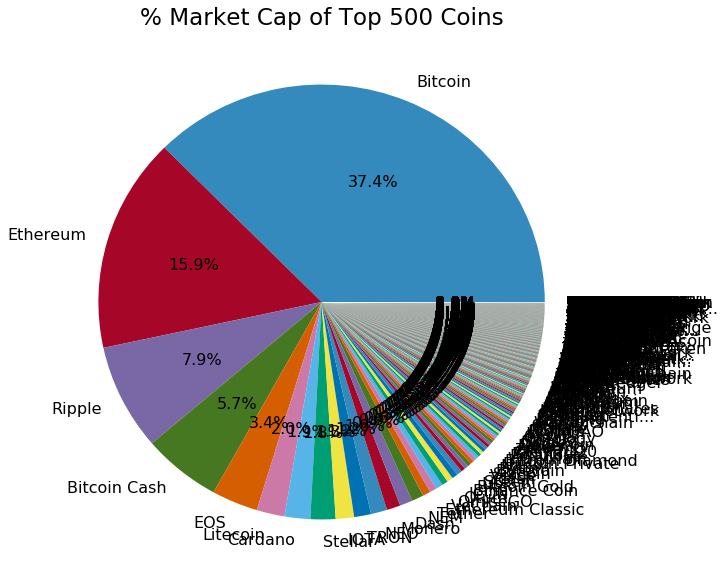

In [57]:
_ = plt.pie(x=coin_df['mktcap'], labels=coin_df['long'], autopct='%1.1f%%')
_ = plt.title('% Market Cap of Top 500 Coins')

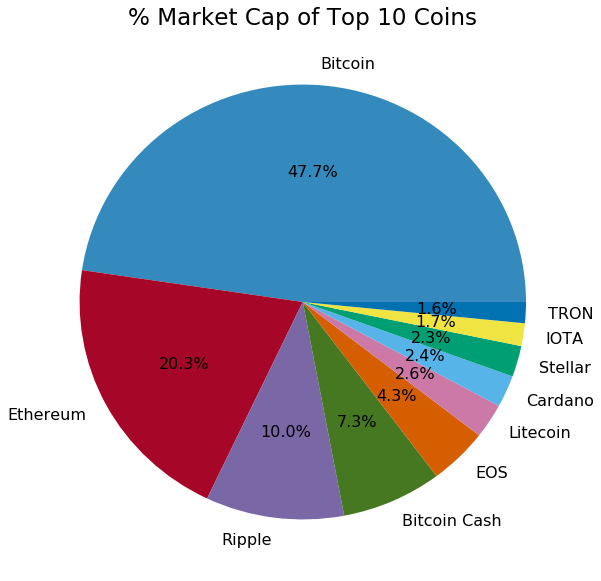

In [66]:
_ = plt.pie(x=coin_df['mktcap'].head(10), labels=coin_df['long'].head(10), autopct='%1.1f%%')
_ = plt.title('% Market Cap of Top 10 Coins')

In [104]:
coin_list = coin_df[['long', 'short']][:500]
coin_list['ticker'] = coin_list['short'] + "/USD"
coin_list.tail()

,long,short,ticker
495,NaPoleonX,NPX,NPX/USD
496,Remme,REM,REM/USD
497,HollyWoodCoin,HWC,HWC/USD
498,Golos,GOLOS,GOLOS/USD
499,CanYaCoin,CAN,CAN/USD


In [136]:
import time

In [139]:
# now that we have a list of top 500 coins, use a reference table to iterate or join over for the CCXT library

# will need to write a for-loop to iterate over each ticker

# testing architecture for single coin

exchange = ccxt.gdax()
markets = exchange.load_markets()

In [140]:
ccxt.gdax.has['fetchOHLCV']

'emulated'

In [142]:
ohlcv = exchange.fetch_ohlcv('BTC/USD', '1d')

In [154]:
cols = ['time', 'open','high','low','close','vol']

df = pd.DataFrame(ohlcv, columns=cols)
df['time'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,time,open,high,low,close,vol
0,2018-04-27,9272.12,9369.00,9059.25,9091.23,9180.991894
1,2018-04-26,8865.98,9318.00,8660.00,9272.12,15215.814741
2,2018-04-25,9645.00,9763.49,8602.43,8865.98,31579.108253
3,2018-04-24,8931.31,9728.56,8930.00,9650.00,20837.835503
4,2018-04-23,8795.00,8991.00,8775.10,8931.30,8040.335580


In [137]:
# try get of OHLCV data for eah ticker in coin_list

if exchange.has['fetchOHLCV']:
    for symbol in coin_list['ticker']:
        time.sleep (exchange.rateLimit / 1000) # time.sleep wants seconds
        print (symbol, exchange.fetch_ohlcv (symbol, '1d')) # one day

BTC/USD [[1462665600000, 459.0, 461.7, 455.9, 459.1, 659.28489475], [1462752000000, 458.0, 464.9, 455.9, 461.9, 1187.8117603], [1462838400000, 461.7, 463.4, 450.0, 452.1, 1013.24355492], [1462924800000, 452.5, 455.0, 450.9, 453.2, 1659.83490013], [1463011200000, 453.2, 455.9, 449.3, 455.9, 840.4801153], [1463097600000, 455.9, 457.5, 452.6, 456.2, 1253.70154456], [1463184000000, 456.8, 458.0, 453.7, 454.5, 956.20465056], [1463270400000, 455.4, 459.7, 454.1, 457.6, 256.63845203], [1463356800000, 457.3, 458.0, 450.1, 453.7, 1269.23949153], [1463443200000, 453.0, 454.9, 451.0, 453.2, 1015.34192489], [1463529600000, 452.7, 455.8, 452.3, 452.3, 1306.21491352], [1463616000000, 453.2, 453.8, 429.0, 429.0, 1041.29600952], [1463702400000, 429.0, 442.6, 427.0, 435.2, 974.52793627], [1463788800000, 439.8, 440.9, 431.0, 438.5, 574.31595746], [1463875200000, 438.5, 442.0, 433.3, 437.4, 2794.53719104], [1463961600000, 437.5, 444.0, 435.5, 442.9, 2836.89887509], [1464048000000, 442.9, 445.7, 441.4, 44

ExchangeNotAvailable: kraken {"error":["EService:Unavailable"]}

In [ ]:

for exchange in exchanges:
    market = ccxt.exchange()

In [ ]:
# production script

def get_coins(num_coins=500, sort_by_bottom=False, field='mktcap', base_curr='USD'):
    '''
    Gets the top (or bottom) N coins based on desired field: from API: CoinCap.io API (/front)
        Defaults to 'mktcap', Top 500
    Args: Number of coins to be returned
          Sort_method: top or bottom after sorting by desired field
          Fields: 'cap24hrChange', 'long', 'mktcap', 'perc', 'price', 'shapeshift',
       'short', 'supply', 'usdVolume', 'volume', 'vwapData', 'vwapDataBTC'
    Returns: Pandas DataFrame   
    '''
    req = requests.get('http://coincap.io/front')
    coin_json = req.json()
    coin_df = pd.DataFrame(coin_json)
    
    
    #check for null values
    for x in set(coin_df.isnull().sum()):
        if x != 0:
            print('WARNING: Requested data contains missing or corrupt data.')
    
    #sort by desired field
    coin_df.sort_values(field, ascending=sort_by_bottom)
    
    #slice the data, discard rest from memory
    coin_df[:num_coins]
    
    
    
    
    
    #add column for application symbol
    coin_df['ticker'] = coin_df['short'] +'/'+str(base_curr)